In [2]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [3]:
## Lee's imports
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

In [4]:
df = pickle.load(open('df_local_all.p','rb'))

In [5]:
df.head()

,speed_10,speed_25,speed_50,speed_75,speed_90,speed_ave,accel_10,accel_25,accel_50,accel_75,...,bearingRate_75,bearingRate_90,bearingRate_ave,distance_traveled,time_traveled,last_lat,last_long,start_lat,start_long,cluster
0,0.106560,0.555120,2.054162,3.578850,4.965843,2.622128,-0.447552,-0.156383,0.000000,0.175392,...,0.000024,0.000046,0.000021,5.927997,258.700000,39.968487,116.399818,39.974294,116.399741,2
0,0.099360,0.722520,1.342082,2.559959,8.843378,4.790770,-0.577842,-0.163441,0.019871,0.249409,...,0.000033,0.000050,0.000032,0.228077,4.616667,39.966182,116.395512,39.965813,116.396532,1
0,0.564336,2.056859,4.873190,21.399302,28.607910,11.862038,-2.016623,-0.389117,-0.001097,0.345506,...,0.000018,0.000038,0.000026,5.087320,110.183333,26.424389,111.612672,26.391234,111.620290,0
0,0.124200,0.686310,2.161799,3.780002,4.911003,2.693128,-0.472651,-0.152696,-0.002448,0.168600,...,0.000028,0.000047,0.000023,4.289100,202.683333,39.968135,116.399702,39.973755,116.398284,2
0,0.000000,0.202320,1.988641,11.342226,25.587666,7.444255,-1.278886,-0.180000,0.000000,0.226935,...,0.000020,0.000042,0.000017,10.214986,285.333333,39.968139,116.399613,39.969352,116.398589,2


In [6]:
pca = PCA(n_components=5)
pca.fit(df.drop(columns=['cluster']))
pcafeatures_train = pca.transform(df.drop(columns=['cluster']))

In [7]:
pd.DataFrame(pcafeatures_train)

,0,1,2,3,4
0,201.087938,-16.169595,27.804767,10.111073,-5.524563
1,-52.584408,-9.546957,23.292794,-1.114355,2.339294
2,53.439932,2.615361,1.717207,-4.112216,-9.251373
3,145.120200,-14.839038,27.203594,8.369588,-3.793633
4,228.250966,-10.782916,10.611596,-0.037933,-12.520802
5,-44.070404,13.460563,-42.337789,13.123131,-3.553746
6,-24.345823,-5.677629,10.706311,-1.937376,1.022161
7,-12.573907,-6.984181,13.602922,-3.077336,0.225569
8,46.468272,-6.398611,8.501992,-4.236337,-4.487469
9,234.600936,-10.234226,8.817677,0.124176,-11.036430


In [8]:
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle(['r','g','b','c','m','y','orange','w','aqua','yellow'])
    target_ids = range(len(target_names))
    plt.figure(figsize=(10,10))
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label, edgecolors='gray')
    plt.legend()

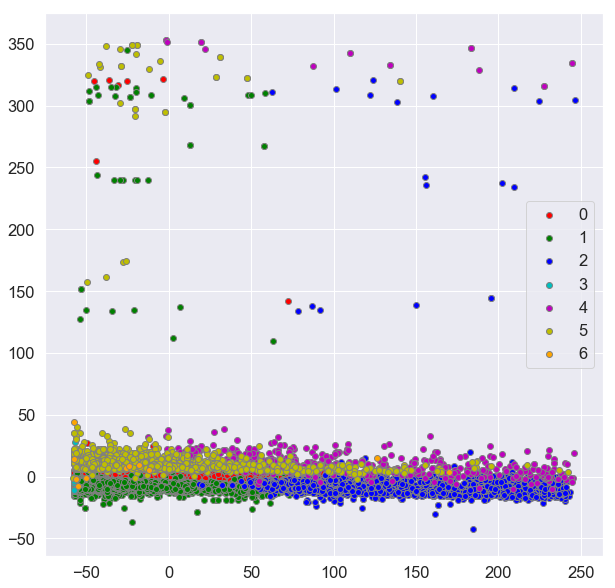

In [9]:
plot_PCA_2D(pcafeatures_train, target=df.cluster, target_names=[0,1,2,3,4,5,6])

In [10]:
pca2 = PCA(n_components=10)
pca2.fit(df.drop(columns=['cluster']))
pcafeatures_train2 = pca2.transform(df.drop(columns=['cluster']))

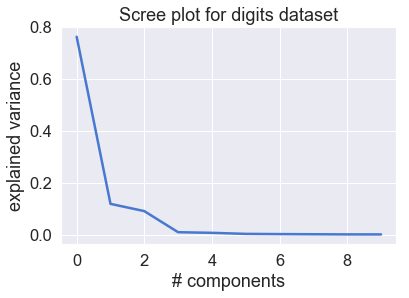

In [11]:
plt.plot(pca2.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot for digits dataset');

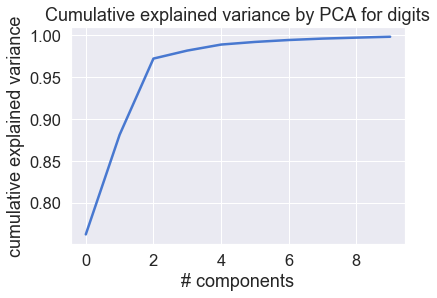

In [12]:
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('# components')
plt.ylabel('cumulative explained variance');
plt.title('Cumulative explained variance by PCA for digits');

In [13]:
from sklearn import datasets
from sklearn.manifold import TSNE

digits = datasets.load_digits()

X = df.drop(columns=['cluster'])

model = TSNE(n_components=2, random_state=0,verbose=0)
low_data = model.fit_transform(X)

<Figure size 1152x1152 with 0 Axes>

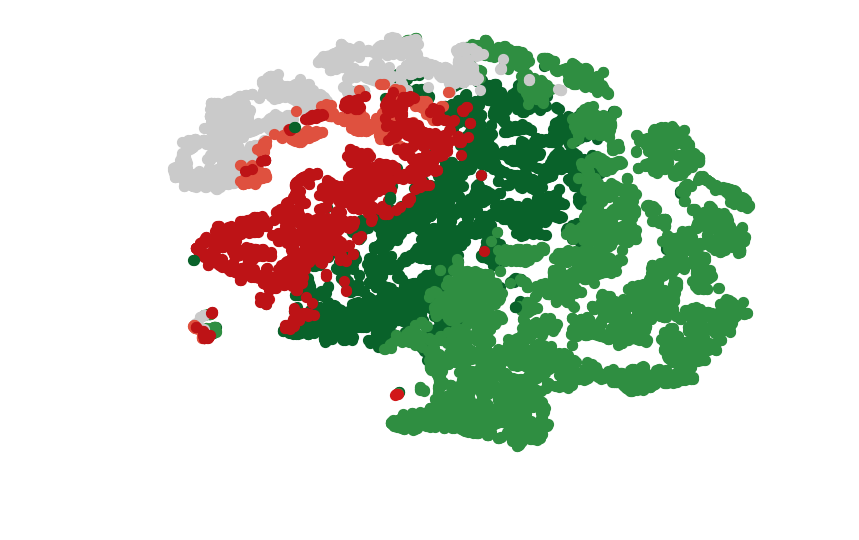

In [25]:

sns.set_style("whitegrid")
sns.set_context("talk")

a4_dims = (8.27, 8.27)
target = df.cluster
target_names = [0,1,2,3,4,5,6]
plt.figure(figsize=(16,16))



colors = cycle(['#09622a','#2f8e41','#cacaca','#d11719','#df513f','#bd1316'])
target_ids = range(len(target_names))
plt.figure(dpi=150)
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(low_data[target == i, 0], low_data[target == i, 1], c=c, label=label, s=15, alpha=1)
#plt.legend(fontsize=10, loc='lower left', frameon=True, facecolor='#FFFFFF', edgecolor='#333333')
plt.xlim(-100,100);
plt.axis('off')
plt.savefig('tsne.png',bbox_inches="tight", dpi=400)

In [17]:
## lee's tSNE
def scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []



    return f, ax, sc, txts

In [19]:
tsne = TSNE(n_components=2, random_state=0,verbose=0).fit_transform(X)

ValueError: 'c' argument has 7 elements, which is not acceptable for use with 'x' with size 14872, 'y' with size 14872.

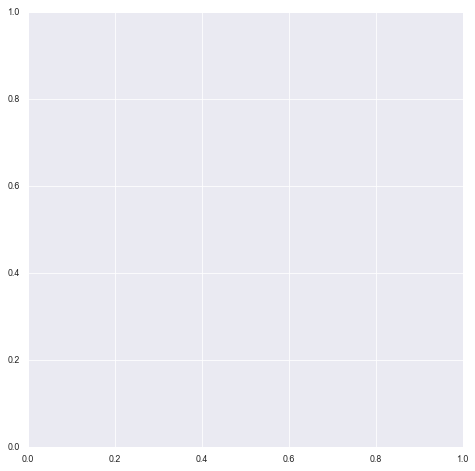

In [20]:
scatter(tsne, df.cluster)